<a href="https://colab.research.google.com/github/Jyoti-S-Shukla/Emotion-Recognition/blob/main/Emotion_recognition_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from tensorflow import keras

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
from zipfile import ZipFile
zf = ZipFile('C:/Users/Prateek/Downloads/nndl/project/face images data.zip', 'r')
zf.extractall('C:/Users/Prateek/Downloads/nndl/project/faceimagesdata')
zf.close()

In [ ]:
train_dir = 'C:/Users/Prateek/Downloads/nndl/project/faceimagesdata/train'
val_dir = 'C:/Users/Prateek/Downloads/nndl/project/faceimagesdata/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
def show_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [ ]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.3))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.3))
emotion_model.add(Dense(7, activation='softmax'))
# emotion_model.load_weights('emotion_model.h5')

cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [ ]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 128)         0

In [ ]:
emotion_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(mode="min", patience=5, restore_best_weights=True)
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=23,
        validation_data=validation_generator,
        validation_steps=7178 // 64,callbacks=[early_stopping],shuffle=True)
# emotion_model.save_weights('emotion_model.h5')

Epoch 1/23
448/448 [==============================] - 37s 82ms/step - loss: 1.7962 - accuracy: 0.2576 - val_loss: 1.6951 - val_accuracy: 0.3152
Epoch 2/23
448/448 [==============================] - 40s 89ms/step - loss: 1.5924 - accuracy: 0.3705 - val_loss: 1.4563 - val_accuracy: 0.4390
Epoch 3/23
448/448 [==============================] - 35s 77ms/step - loss: 1.4340 - accuracy: 0.4431 - val_loss: 1.3661 - val_accuracy: 0.4710
Epoch 4/23
448/448 [==============================] - 35s 78ms/step - loss: 1.3464 - accuracy: 0.4801 - val_loss: 1.2876 - val_accuracy: 0.5015
Epoch 5/23
448/448 [==============================] - 35s 78ms/step - loss: 1.2931 - accuracy: 0.5025 - val_loss: 1.2368 - val_accuracy: 0.5225
Epoch 6/23
448/448 [==============================] - 35s 78ms/step - loss: 1.2434 - accuracy: 0.5240 - val_loss: 1.2168 - val_accuracy: 0.5321
Epoch 7/23
448/448 [==============================] - 45s 100ms/step - loss: 1.2159 - accuracy: 0.5337 - val_loss: 1.1862 - val_accuracy

In [ ]:
emotion_model.save_weights('emotion_model')

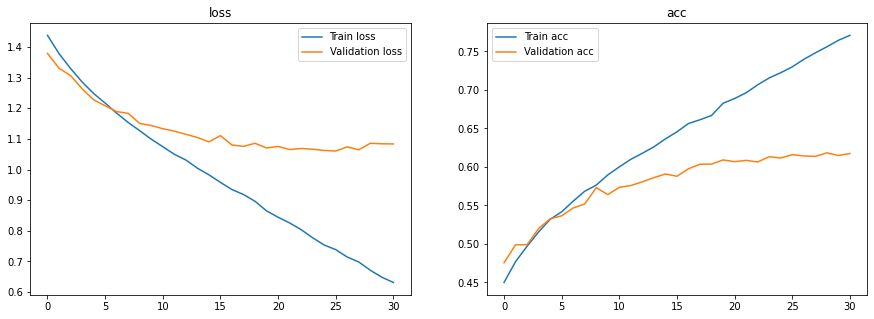

In [ ]:
show_history(emotion_model_info)

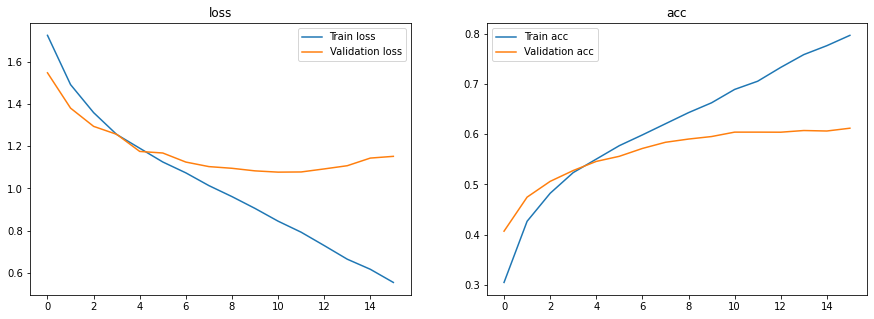

In [ ]:
show_history(emotion_model_info)

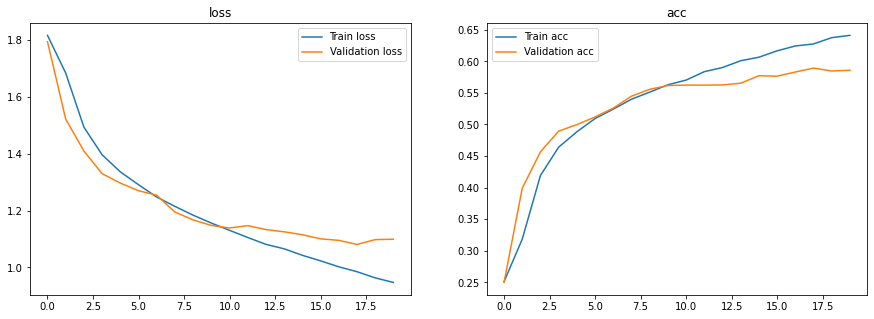

In [ ]:
show_history(emotion_model_info)

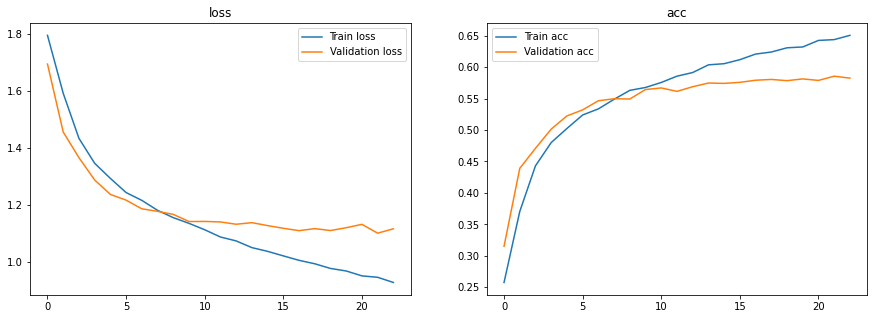

In [ ]:
show_history(emotion_model_info)

In [ ]:
np.save('my_history.npy',emotion_model_info.history)


In [ ]:
history=np.load('my_history.npy',allow_pickle='TRUE').item()

In [ ]:
#updated
emotion1_model = Sequential()

emotion1_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion1_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion1_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion1_model.add(Dropout(0.25))

emotion1_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion1_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion1_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion1_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion1_model.add(Dropout(0.25))

emotion1_model.add(Flatten())
emotion1_model.add(Dense(1024, activation='relu'))
emotion1_model.add(Dropout(0.5))
emotion1_model.add(Dense(7, activation='softmax'))
# emotion_model.load_weights('emotion_model.h5')

cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [ ]:
emotion1_model.load_weights('C:/Users/Prateek/Downloads/nndl/project/emotion_model.h5')

In [ ]:
# start the webcam feed / live camera
cap = cv2.VideoCapture(0)
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
    bounding_box = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Video', cv2.resize(frame,(1200,860),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
# Load the cascade  //// recorded video
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 
  
# To capture video from existing video.   
cap = cv2.VideoCapture('C:/Users/Prateek/Downloads/nndl/project/2.mp4')  
  
fourcc = cv2.VideoWriter_fourcc('m','p','4','v')# note the lower case
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
out = cv2.VideoWriter('vid4_out.mp4',fourcc , 10, (frame_width,frame_height), True)    
    
while True:  
    # Read the frame  
    _, img = cap.read()  
    # Convert to grayscale  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
   # Detect the faces  
    faces = face_cascade.detectMultiScale(img, 1.1, 4)  
  # Draw the rectangle around each face  
    for (x, y, w, h) in faces:  
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)  
        roi_gray_frame = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        emotion_prediction = emotion1_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(img, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

  # Display  
    cv2.imshow('Video', img)  
    out.write(img)
  # Stop if enter key is pressed  
    if cv2.waitKey(25) == 13:
        break
          
# Release the VideoCapture object  
cap.release()  
out.release()
cv2.destroyAllWindows()